In [1]:
%matplotlib inline
#import modules
import pandas as pd
import numpy as np
#read csv file in DataFrame
df = pd.read_csv('conversion_data.csv')
#inspect data
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
#pretty young population
#conversion rate about 3%
df.iloc[0]

country                 UK
age                     25
new_user                 1
source                 Ads
total_pages_visited      1
converted                0
Name: 0, dtype: object

In [5]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,316190,316191,316192,316193,316194,316195,316196,316197,316198,316199
country,UK,US,US,China,US,US,China,US,UK,US,...,US,US,China,UK,UK,US,US,China,US,UK
age,25,23,28,39,30,31,27,23,29,25,...,23,40,35,32,28,26,27,25,22,24
new_user,1,1,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,1,0,0,0
source,Ads,Seo,Seo,Seo,Seo,Seo,Seo,Ads,Direct,Ads,...,Ads,Seo,Seo,Direct,Seo,Ads,Direct,Ads,Seo,Ads
total_pages_visited,1,5,4,5,6,1,4,4,4,2,...,4,4,7,5,8,9,6,4,4,4
converted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.max()

country                 US
age                    123
new_user                 1
source                 Seo
total_pages_visited     29
converted                1
dtype: object

In [7]:
#probably US site
#probably wrong data, age 123
print(df.loc[df['age'] == 123])

       country  age  new_user source  total_pages_visited  converted
90928  Germany  123         0    Seo                   15          1


In [8]:
np.sort(df['age'].unique())

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  73,  77,  79, 111, 123])

In [9]:
df.loc[df['age'] > 79]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [10]:
#remove this 2 users because of unrealistic data
df_new = df[df['age'] < 80]

In [11]:
#plot x-country, y-conversion_rate
import matplotlib.pyplot as plt
conversion_rate = df_new.groupby('country', as_index=False).agg({'converted':'mean'})
conversion_rate.columns

Index(['country', 'converted'], dtype='object')

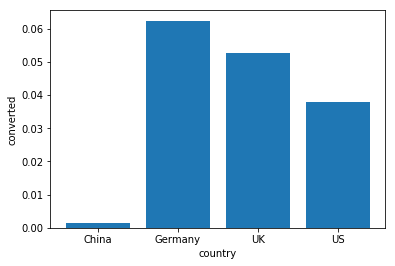

In [12]:
plt.bar(conversion_rate['country'], conversion_rate['converted'])
plt.xlabel('country')
plt.ylabel('converted')
plt.show()

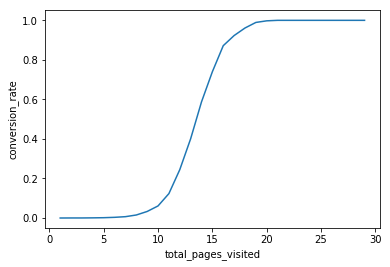

In [13]:
#low China conversion rate
#bigest German conversion rate
conversion_rate = df_new.groupby('total_pages_visited', as_index=False).agg({'converted':'mean'})
plt.plot(conversion_rate['total_pages_visited'], conversion_rate['converted'])
plt.xlabel('total_pages_visited')
plt.ylabel('conversion_rate')
plt.show()

In [ ]:
#the time spent on the site increases probability for conversion